In [1]:
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


In [3]:
df=pd.read_csv("bank_nifty.csv")
df.head()

Date      Open      High       Low     Close     Volume
0  1/1/2018  25565.75  25588.00  25271.55  25318.10   57576913
1  1/2/2018  25382.20  25425.50  25232.80  25338.25   72033811
2  1/3/2018  25425.75  25454.90  25300.90  25318.60   59730356
3  1/4/2018  25367.65  25490.35  25310.30  25462.60  105995860
4  1/5/2018  25524.45  25643.35  25499.55  25601.85  123622612

In [4]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [6]:
df['Volume'].unique()

array(['57576913', '72033811', '59730356', '105995860', '123622612',
       '127527935', '101820385', '81094270', '122695505', '110836433',
       '192163936', '169867241', '172092208', '224021671', '134390957',
       '113869602', '169332288', '174331160', '193342305', '114099251',
       '111009534', '109507598', '131188028', '147521488', '122729724',
       '153713739', '121038215', '91011548', '75985052', '161180184',
       '197286979', '291475391', '278142760', '273464127', '258222746',
       '152405865', '167442673', '127862871', '110903837', '289806608',
       '311474002', '214529321', '138679764', '135108832', '187523331',
       '169549517', '-', '165215227', '235984528', '209048209',
       '130382242', '189684825', '147614260', '127991875', '131439602',
       '180649286', '193627423', '178620655', '183841858', '126222576',
       '133764907', '160970708', '171760040', '107073367', '111777276',
       '110293693', '89034228', '89721865', '95466036', '109581669',
       '8

In [7]:
df.loc[df['Volume'] =='-']

Date      Open      High       Low     Close Volume
46     3/9/2018  24556.95  24564.75  24259.70  24296.45      -
54    3/21/2018  24331.30  24459.75  24208.65  24255.60      -
60     4/2/2018  24235.65  24373.40  24062.95  24328.50      -
61     4/3/2018  24285.95  24538.00  24254.35  24510.60      -
65     4/9/2018  24848.85  25152.85  24828.00  25093.80      -
72    4/18/2018  25426.75  25426.75  25058.75  25102.30      -
365   6/26/2019  30809.20  31202.70  30766.65  31162.35      -
445  10/25/2019  29228.65  29452.10  28923.80  29395.95      -
948   11/1/2021  39432.15  39862.60  39120.65  39763.75      -

In [8]:
df['Volume'] = df['Volume'].replace('-', np.nan)

df['Volume'] = df['Volume'].fillna(method='ffill')

In [9]:
df.loc[df['Volume'] =='-']

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [10]:
df['Volume'] = df['Volume'].astype('float64')

In [11]:
df.describe()

Open          High           Low         Close        Volume
count    955.000000    955.000000    955.000000    955.000000  9.550000e+02
mean   28575.225969  28805.647958  28291.096178  28550.485812  2.930864e+08
std     4823.393891   4813.805396   4831.728274   4827.044525  1.682653e+08
min    16759.950000  17681.700000  16116.250000  16917.650000  1.896656e+07
25%    25487.200000  25651.575000  25252.175000  25443.475000  1.703090e+08
50%    27972.950000  28185.150000  27777.400000  28021.700000  2.606606e+08
75%    31523.500000  31742.175000  31240.750000  31515.000000  3.680159e+08
max    41234.550000  41829.600000  40829.150000  41238.300000  1.568143e+09

In [12]:
df.shape

(955, 6)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.set_index('Date',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 955 entries, 2018-01-01 to 2021-11-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    955 non-null    float64
 1   High    955 non-null    float64
 2   Low     955 non-null    float64
 3   Close   955 non-null    float64
 4   Volume  955 non-null    float64
dtypes: float64(5)
memory usage: 44.8 KB


In [77]:
df.head()

Open      High       Low     Close       Volume
Date                                                           
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0

In [17]:
df1=df.copy()
df1.head()

Open      High       Low     Close       Volume
Date                                                           
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0

In [21]:
print(df1.index.unique())

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01',
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-08',
               '2021-11-09', '2021-11-10'],
              dtype='datetime64[ns]', name='Date', length=955, freq=None)


<Axes: ylabel='Date'>

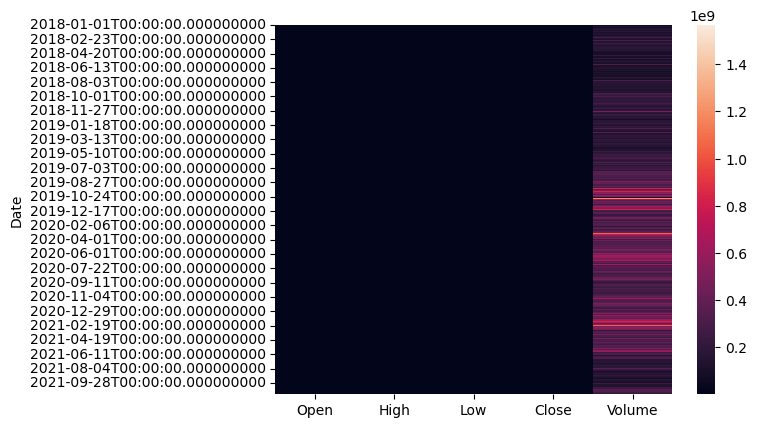

In [18]:
sn.heatmap(data = df1)

In [22]:
target_corr = df1.drop("Volume", axis=1).apply(lambda x: x.corr(df1["Volume"]))
print(target_corr)

Open    -0.010814
High     0.007664
Low     -0.029442
Close   -0.010030
dtype: float64


In [23]:
print(df1.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.998461  0.998387  0.996952 -0.010814
High    0.998461  1.000000  0.997471  0.998621  0.007664
Low     0.998387  0.997471  1.000000  0.998409 -0.029442
Close   0.996952  0.998621  0.998409  1.000000 -0.010030
Volume -0.010814  0.007664 -0.029442 -0.010030  1.000000


In [24]:
numeric_columns = df1.select_dtypes(np.number)

# Check for negative values
has_negative_values = numeric_columns.lt(0).any().reindex(df1.columns, fill_value=False)
print(has_negative_values)

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool


In [23]:
from sklearn.metrics import silhouette_score
import numpy as np


In [25]:
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)  # Adjust contamination as needed
iso_forest.fit(df1)

anomaly_scores = iso_forest.decision_function(df1)
is_anomaly = iso_forest.predict(df1)

df1['anomaly_score'] = anomaly_scores
df1['is_anomaly'] = is_anomaly

print(df1)

                Open      High       Low     Close       Volume  \
Date                                                              
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0   
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0   
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0   
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0   
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0   
...              ...       ...       ...       ...          ...   
2021-11-03  40040.65  40160.20  39304.85  39402.05  267471244.0   
2021-11-04  39669.10  39734.70  39514.15  39573.70   38771464.0   
2021-11-08  39674.05  39674.05  38932.15  39438.25  212859120.0   
2021-11-09  39517.85  39560.60  39223.40  39368.80  203521905.0   
2021-11-10  39206.20  39220.30  38873.80  39023.25  167942059.0   

            anomaly_score  is_anomaly  
Date                                   
2018-01-01       0.055592           1  
2018-01-

In [29]:
from collections import Counter
a = dict(Counter(df1['is_anomaly']))
print(a)

{1: 768, -1: 187}


In [48]:
df1.head()

Open      High       Low     Close       Volume  \
Date                                                              
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0   
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0   
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0   
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0   
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0   

            anomaly_score  is_anomaly  
Date                                   
2018-01-01       0.055592           1  
2018-01-02       0.058591           1  
2018-01-03       0.056355           1  
2018-01-04       0.073267           1  
2018-01-05       0.078928           1

In [30]:
from sklearn.metrics import silhouette_score
import numpy as np

labels=is_anomaly 
adjusted_labels = np.where(labels == -1, 0, 1)

silhouette_avg = silhouette_score(df1, adjusted_labels)

print(f'Silhouette Coefficient: {silhouette_avg:.3f}')


Silhouette Coefficient: 0.316


In [36]:
a_idx=np.where(is_anomaly<0);
len(a_idx[0])

187

In [37]:
df1.iloc[:,4]

Date
2018-01-01     57576913.0
2018-01-02     72033811.0
2018-01-03     59730356.0
2018-01-04    105995860.0
2018-01-05    123622612.0
                 ...     
2021-11-03    267471244.0
2021-11-04     38771464.0
2021-11-08    212859120.0
2021-11-09    203521905.0
2021-11-10    167942059.0
Name: Volume, Length: 955, dtype: float64

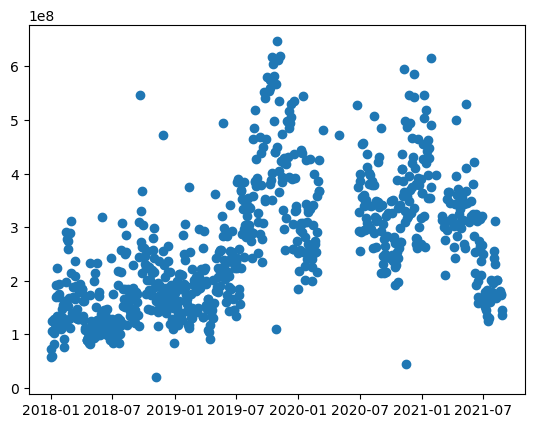

In [40]:
plt.scatter(normal_data.index,normal_data['Volume'], label='Normal Data')

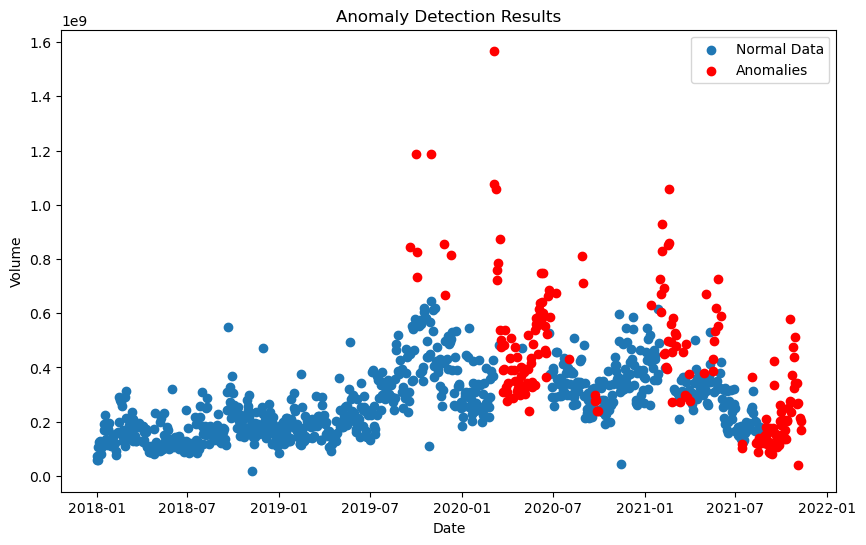

In [42]:
import matplotlib.pyplot as plt

normal_data = df1[df1['is_anomaly'] == 1]
anomalies = df1[df1['is_anomaly'] == -1]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data.index,normal_data['Volume'], label='Normal Data')
plt.scatter(anomalies.index, anomalies['Volume'], color='r', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()


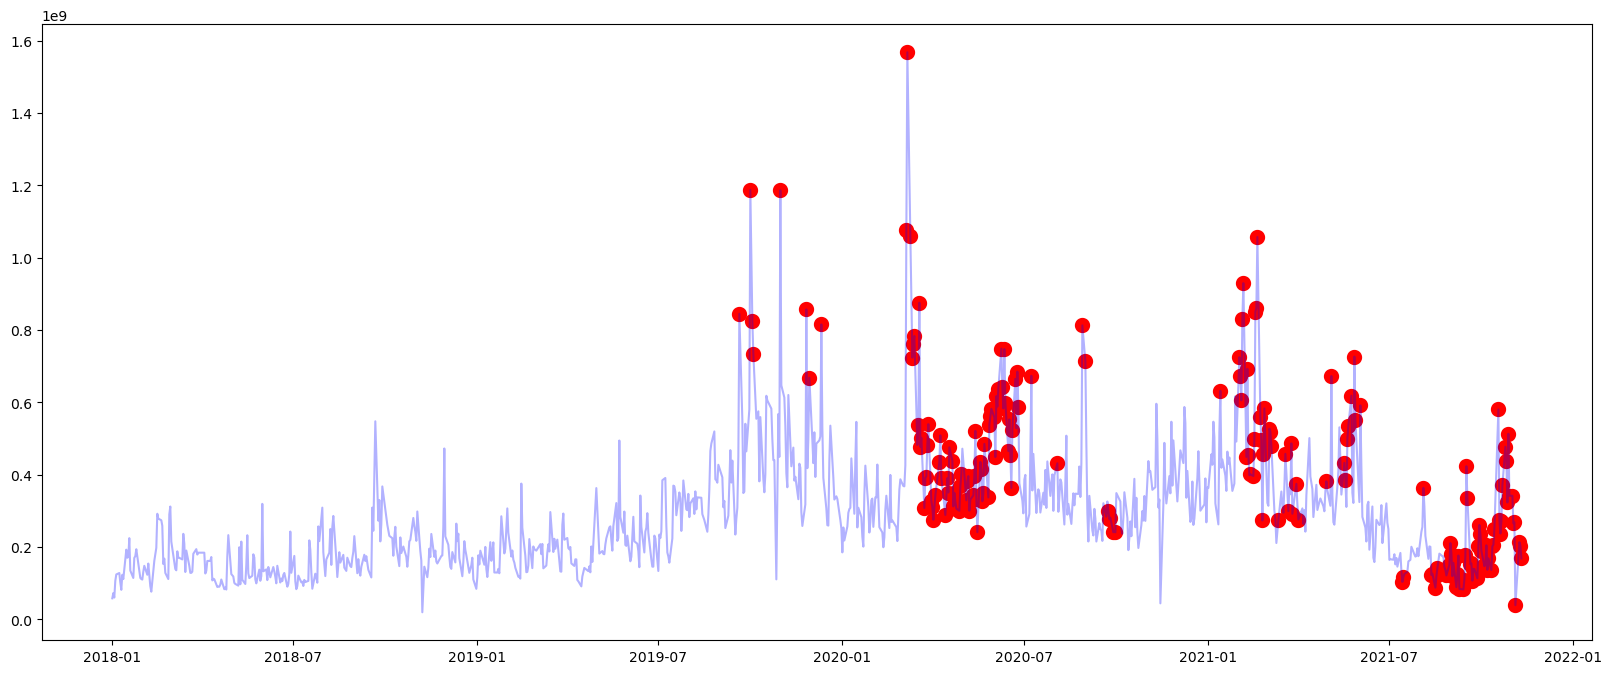

In [97]:
# plot data
plt.figure(figsize=(20,8))
plt.plot(df1.index,df1["Volume"] ,color = "b",alpha = 0.3)
# plot outlier values
plt.scatter(anomalies.index, anomalies['Volume'], color='r',linewidths=5)

In [207]:
iso_ano=np.array(df1['is_anomaly'])
iso_ano[iso_ano==1]=0
iso_ano[iso_ano==-1]=1
print(iso_ano)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [52]:
df2=df.copy()

In [53]:
X=df2.values

In [54]:
from sklearn.neighbors import NearestNeighbors

In [71]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

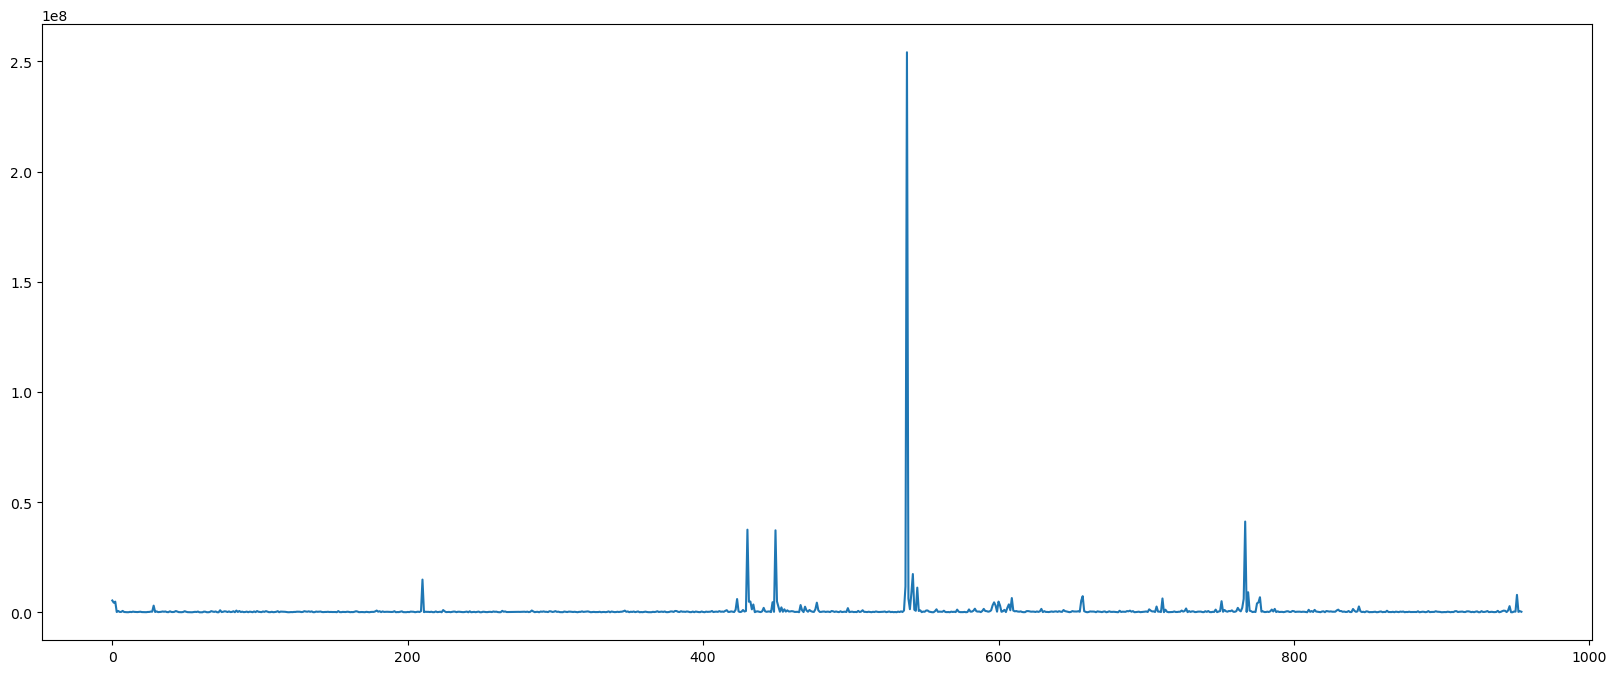

In [72]:
distances, indexes = nbrs.kneighbors(X)
plt.figure(figsize=(20,8))
plt.plot(distances.mean(axis =1))

In [86]:
n_neighbors = 3
anomaly_threshold = np.percentile(distances[:, n_neighbors-1], 95)

is_anomaly = distances[:, n_neighbors-1] > anomaly_threshold
df2['is_anomaly']=is_anomaly
true_count = df2['is_anomaly'].value_counts()[True]
df2.head()

Open      High       Low     Close       Volume  is_anomaly
Date                                                                       
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0        True
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0        True
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0        True
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0       False
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0       False

In [92]:
outlier_index = np.where(distances[:, n_neighbors-1] > anomaly_threshold)
outlier_index

(array([  0,   1,   2,  28, 210, 423, 430, 431, 432, 434, 441, 447, 449,
        450, 451, 453, 466, 469, 477, 537, 538, 539, 541, 542, 545, 596,
        597, 598, 600, 601, 606, 607, 609, 656, 657, 707, 711, 751, 765,
        766, 767, 769, 775, 776, 777, 844, 946, 951], dtype=int64),)

In [94]:
outlier_values = df2.iloc[outlier_index]
outlier_values

Open      High       Low     Close        Volume  is_anomaly
Date                                                                        
2018-01-01  25565.75  25588.00  25271.55  25318.10  5.757691e+07        True
2018-01-02  25382.20  25425.50  25232.80  25338.25  7.203381e+07        True
2018-01-03  25425.75  25454.90  25300.90  25318.60  5.973036e+07        True
2018-02-09  25466.30  25598.30  25371.00  25463.65  7.598505e+07        True
2018-11-07  25818.10  25824.40  25698.10  25737.50  1.896656e+07        True
2019-09-20  26878.65  29418.95  26727.55  28981.55  8.445824e+08        True
2019-10-01  29226.15  29526.40  28077.35  28725.50  1.187314e+09        True
2019-10-03  28606.70  28769.10  28240.80  28414.10  8.257568e+08        True
2019-10-04  28681.90  28730.30  27653.70  27731.85  7.327191e+08        True
2019-10-09  27901.65  28857.70  27702.05  28785.85  5.748327e+08        True
2019-10-18  28954.80  29249.50  28864.10  29120.25  6.051702e+08        True
2019-10-29  29527.60  29997.65  29385.45  29873.05  5.675560e+08        True
2019-10-31  30168.65  30415.65  29987.15  30066.25  1.186434e+09        True
2019-11-01  30196.15  30409.00  30028.90  30330.55  6.467459e+08        True
2019-11-04  30415.90  30607.05  30227.25  30333.10  6.130190e+08        True
2019-11-06  30225.20  30699.00  30013.65  30609.60  4.039578e+08        True
2019-11-26  31692.85  31850.35  31465.85  31718.35  8.566898e+08        True
2019-11-29  32074.15  32086.95  31770.80  31946.10  6.677842e+08        True
2019-12-11  31151.65  31337.85  30996.40  31256.75  8.153533e+08        True
2020-03-05  28830.30  29134.30  28535.60  28815.35  1.075709e+09        True
2020-03-06  27649.95  28047.20  27162.30  27801.45  1.568143e+09        True
2020-03-09  27031.45  27091.60  25923.40  26462.60  1.058983e+09        True
2020-03-12  25175.90  25223.10  23536.35  23971.15  7.605763e+08        True
2020-03-13  22720.75  25670.75  21351.70  25166.45  7.833852e+08        True
2020-03-18  22411.85  22544.05  20267.95  20580.20  8.752880e+08        True
2020-06-05  20516.40  21198.70  20425.05  21034.50  6.374470e+08        True
2020-06-08  21636.10  21807.40  20911.25  21187.35  7.481103e+08        True
2020-06-09  21295.50  21568.85  20629.70  20724.90  6.412461e+08        True
2020-06-11  21084.70  21244.45  20458.30  20525.15  7.470653e+08        True
2020-06-12  19529.30  20747.70  19526.10  20654.55  5.991901e+08        True
2020-06-19  20970.10  21467.65  20878.25  21338.10  5.233713e+08        True
2020-06-22  21491.55  22078.25  21425.55  21708.35  6.646065e+08        True
2020-06-24  22479.35  22479.55  21336.35  21426.80  6.845748e+08        True
2020-08-28  23635.30  24611.80  23599.20  24523.80  8.126466e+08        True
2020-08-31  25038.80  25232.60  23385.30  23754.35  7.129757e+08        True
2020-11-10  28039.45  28802.50  27916.90  28606.00  5.957967e+08        True
2020-11-14  28685.70  28752.45  28431.85  28594.30  4.367235e+07        True
2021-01-13  32546.60  32683.50  32148.25  32574.65  6.318063e+08        True
2021-02-03  34555.60  34908.05  34011.90  34758.45  6.052042e+08        True
2021-02-04  34548.90  35413.15  34238.90  35344.80  8.296718e+08        True
2021-02-05  35634.95  36615.20  35545.00  35654.50  9.295842e+08        True
2021-02-09  36058.80  36477.15  35636.85  36056.50  6.924810e+08        True
2021-02-17  37041.95  37331.45  36764.25  36910.95  8.504874e+08        True
2021-02-18  37088.75  37108.75  36367.45  36587.00  8.603311e+08        True
2021-02-19  36371.55  36656.20  35584.60  35841.60  1.057099e+09        True
2021-06-02  35271.60  35415.85  35070.30  35373.75  5.913636e+08        True
2021-10-28  40915.15  40931.05  39350.20  39508.95  5.127215e+08        True
2021-11-04  39669.10  39734.70  39514.15  39573.70  3.877146e+07        True

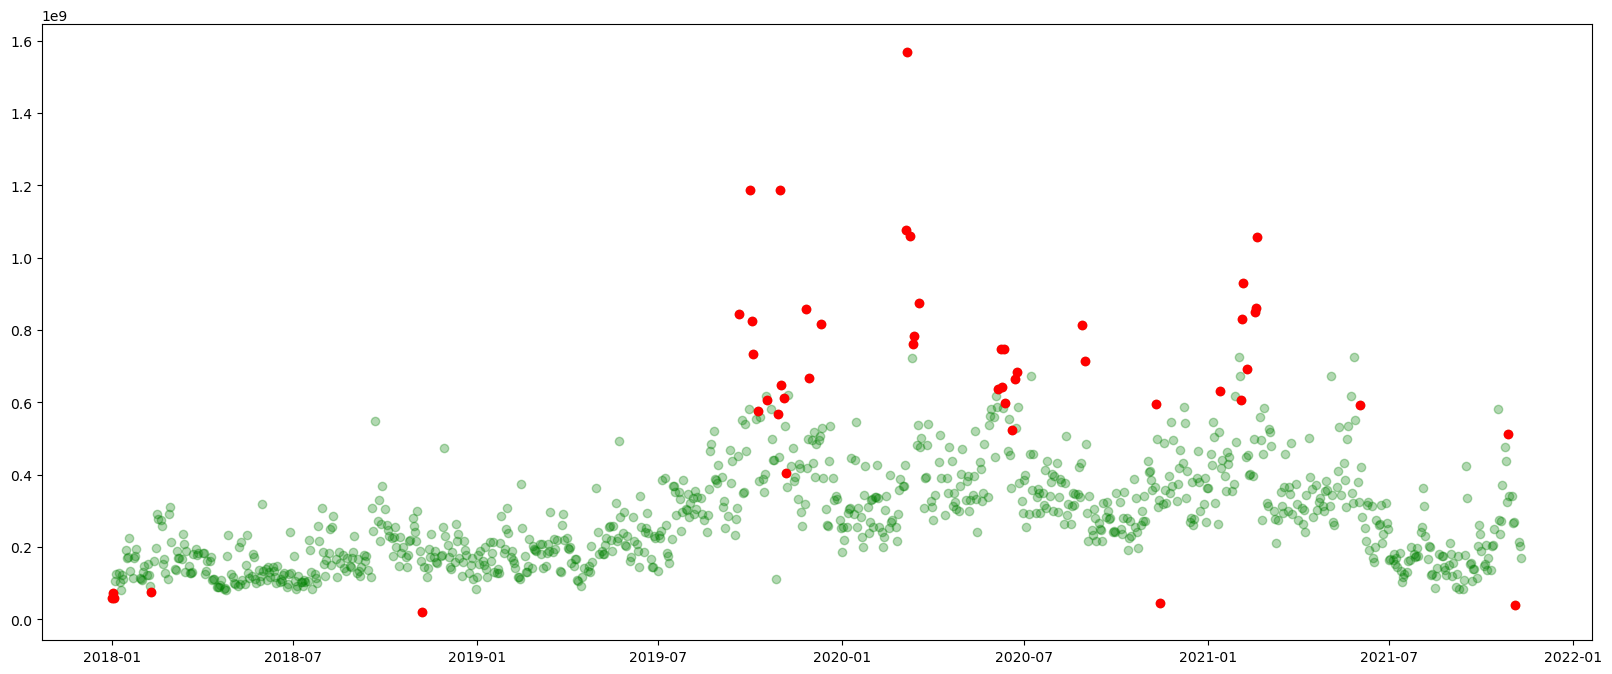

In [95]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(df2.index,df2["Volume"] ,color = "g",alpha=0.3)
otlr_val = df2.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val["Volume"], color = "r")

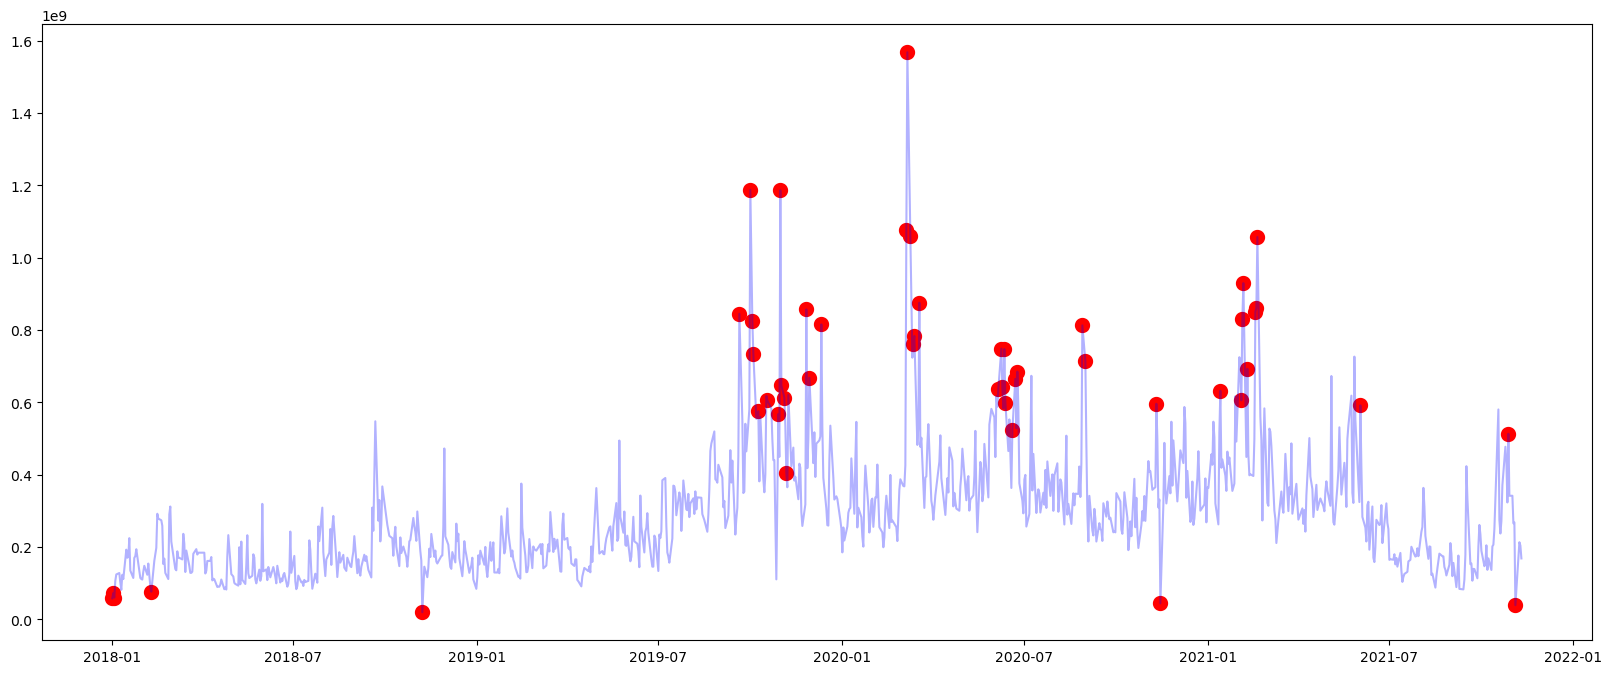

In [96]:
# plot data
plt.figure(figsize=(20,8))
plt.plot(df2.index,df2["Volume"] ,color = "b",alpha = 0.3)
# plot outlier values
plt.scatter(otlr_val.index,otlr_val["Volume"], color='r',linewidths=5)

In [214]:
df2['is_anomaly']=df2['is_anomaly'].astype(int)
df2.head()

Open      High       Low     Close       Volume  is_anomaly
Date                                                                       
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0           1
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0           1
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0           1
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0           0
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0           0

In [215]:
kn_ano=np.array(df2['is_anomaly'])
print(kn_ano)

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Anomaly Detection Using DBSCAN

In [98]:
from sklearn.cluster import DBSCAN

In [144]:
df3=df.copy()

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df3)
df3=pd.DataFrame(scaled_features)
df3.head()

0         1         2         3         4
0 -0.624260 -0.668771 -0.625269 -0.669992 -1.400365
1 -0.662334 -0.702546 -0.633293 -0.665815 -1.314403
2 -0.653301 -0.696435 -0.619191 -0.669888 -1.387561
3 -0.665352 -0.689067 -0.617245 -0.640040 -1.112461
4 -0.632827 -0.657267 -0.578056 -0.611177 -1.007650

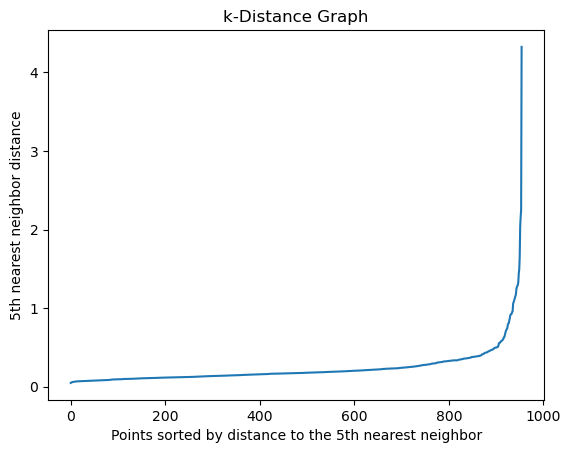

In [146]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

X = df3

min_samples = 6

nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = nbrs.kneighbors(X)

sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

plt.plot(sorted_distances)
plt.xlabel("Points sorted by distance to the 5th nearest neighbor")
plt.ylabel("5th nearest neighbor distance")
plt.title("k-Distance Graph")
plt.show()


In [147]:
X=df3.values
dbscan = DBSCAN(eps = 0.5, min_samples= 6)

In [148]:
db_model = dbscan.fit(X)

In [149]:
labels = dbscan.fit_predict(X)
is_anomaly=labels

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

anomalies = X[labels == -1]
normal_points = X[labels != -1]
df3['is_anomaly']=is_anomaly
df3.head()

0         1         2         3         4  is_anomaly
0 -0.624260 -0.668771 -0.625269 -0.669992 -1.400365           0
1 -0.662334 -0.702546 -0.633293 -0.665815 -1.314403           0
2 -0.653301 -0.696435 -0.619191 -0.669888 -1.387561           0
3 -0.665352 -0.689067 -0.617245 -0.640040 -1.112461           0
4 -0.632827 -0.657267 -0.578056 -0.611177 -1.007650           0

In [150]:
from collections import Counter
a = dict(Counter(df3['is_anomaly']))
print(a)

{0: 918, -1: 37}


In [151]:
df3['is_anomaly'].unique()

array([ 0, -1], dtype=int64)

In [158]:
feature_name = 'is_anomaly'
value = -1

outlier_index = df3.index[df3[feature_name] == value].tolist()

print("Indices:", len(outlier_index))

Indices: 37


In [159]:
# filter outlier values
outlier_values = df3.iloc[outlier_index]
outlier_values

0         1         2         3         4  is_anomaly
179 -0.465513 -0.481212 -0.670452 -0.612203  1.511496          -1
423 -0.351923  0.127472 -0.323769  0.089349  3.279255          -1
430  0.135022  0.149804 -0.044261  0.036276  5.317175          -1
431  0.006529 -0.007596 -0.010415 -0.028269  3.167316          -1
432  0.022128 -0.015661 -0.131988 -0.169682  2.614104          -1
449  0.330526  0.334630  0.351208  0.314179  5.311943          -1
466  0.646694  0.632825  0.657408  0.656618  3.351248          -1
469  0.725787  0.682001  0.720555  0.703825  2.227994          -1
477  0.534432  0.526305  0.560197  0.560940  3.105456          -1
537  0.052910  0.068309  0.050630  0.054900  4.653562          -1
538 -0.191931 -0.157639 -0.233744 -0.155256  7.581625          -1
539 -0.320228 -0.356256 -0.490288 -0.432766  4.554105          -1
540 -0.477606 -0.418640 -0.425950 -0.427542  2.558070          -1
541 -0.705127 -0.744614 -0.984583 -0.949180  2.779746          -1
542 -1.214403 -0.651572 -1.436967 -0.701425  2.915370          -1
545 -1.278479 -1.301440 -1.661383 -1.652038  3.461834          -1
597 -1.439394 -1.454549 -1.528172 -1.526191  2.705622          -1
600 -1.553771 -1.571555 -1.621966 -1.663449  2.699408          -1
656 -1.024696 -0.871669 -0.971568 -0.834630  3.089362          -1
657 -0.733566 -0.742639 -1.015861 -0.994117  2.496708          -1
711  0.022916 -0.011057  0.029146  0.009082 -1.483044          -1
751  0.823788  0.805991  0.798715  0.834107  2.014066          -1
763  0.498069  0.935229  0.541571  0.940729  2.565845          -1
766  1.239128  1.373334  1.231634  1.408289  3.190596          -1
767  1.464409  1.623174  1.502093  1.472482  3.784685          -1
769  1.552329  1.594481  1.521113  1.555806  2.374844          -1
775  1.756266  1.772043  1.754568  1.732912  3.314367          -1
776  1.765973  1.725756  1.672401  1.665766  3.372899          -1
777  1.617203  1.631696  1.510293  1.511263  4.542906          -1
824  0.837022  0.874174  0.807650  0.771034  2.256256          -1
840  1.263045  1.333355  1.291851  1.356522  2.575223          -1
938  2.327179  2.315796  2.335471  2.307861  1.706193          -1
943  2.569252  2.706959  2.529820  2.620348  1.092557          -1
944  2.589269  2.610862  2.596302  2.629862  0.856360          -1
945  2.625943  2.606654  2.579912  2.554425  0.176879          -1
946  2.559689  2.520201  2.290050  2.271412  1.305974          -1
951  2.301219  2.271546  2.324000  2.284833 -1.512185          -1

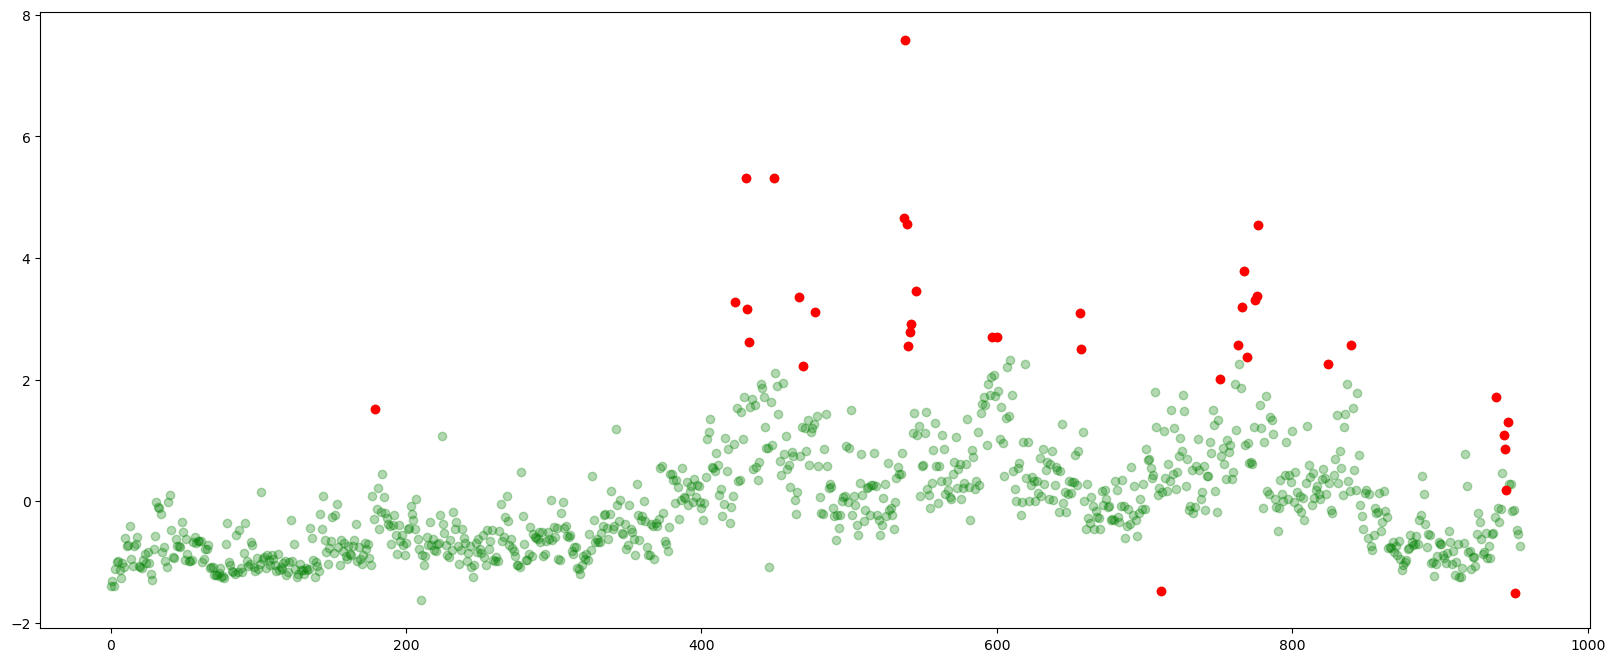

In [160]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(df3.index,df3[4] ,color = "g",alpha=0.3)
otlr_val = df3.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val[4], color = "r")

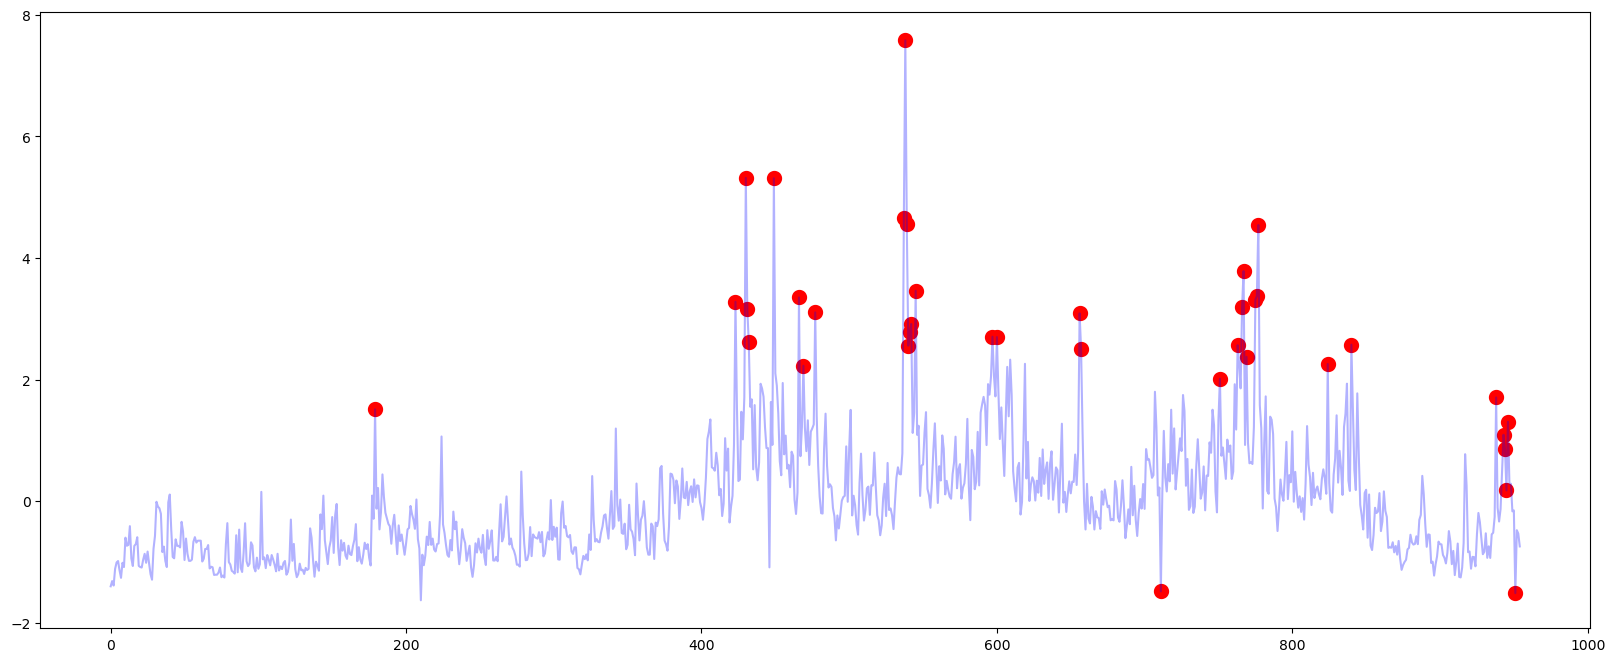

In [161]:
# plot data
plt.figure(figsize=(20,8))
plt.plot(df3.index,df3[4] ,color = "b",alpha = 0.3)
# plot outlier values
plt.scatter(otlr_val.index,otlr_val[4], color='r',linewidths=5)

In [221]:
db_ano=np.array(df3['is_anomaly'])
db_ano[db_ano==-1]=1
print(db_ano)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [164]:
df4=df.copy()
df4.head()

Open      High       Low     Close       Volume
Date                                                           
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0

In [177]:
df4.tail()

Open      High       Low     Close       Volume
Date                                                           
2021-11-03  40040.65  40160.20  39304.85  39402.05  267471244.0
2021-11-04  39669.10  39734.70  39514.15  39573.70   38771464.0
2021-11-08  39674.05  39674.05  38932.15  39438.25  212859120.0
2021-11-09  39517.85  39560.60  39223.40  39368.80  203521905.0
2021-11-10  39206.20  39220.30  38873.80  39023.25  167942059.0

In [173]:
from prophet import Prophet

In [175]:
df_fb = df4.reset_index()[['Date', 'Volume']].rename({'Date':'ds', 'Volume':'y'}, axis='columns')
df_fb.tail()

ds            y
950 2021-11-03  267471244.0
951 2021-11-04   38771464.0
952 2021-11-08  212859120.0
953 2021-11-09  203521905.0
954 2021-11-10  167942059.0

In [180]:
#train test split
train = df_fb[(df_fb['ds'] >= '2018-01-01') & (df_fb['ds'] <= '2020-11-27')]
test = df_fb[(df_fb['ds'] > '2020-11-27')]

In [181]:
m = Prophet(changepoint_range=0.95)
m.fit(train)

20:09:34 - cmdstanpy - INFO - Chain [1] start processing
20:09:35 - cmdstanpy - INFO - Chain [1] done processing


In [182]:
future = m.make_future_dataframe(periods=119)

In [183]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
835 2021-03-22  1.412043e+08 -5.843710e+06  2.821192e+08
836 2021-03-23  1.416686e+08  5.864396e+05  2.880193e+08
837 2021-03-24  1.387611e+08 -1.025348e+07  2.732190e+08
838 2021-03-25  1.442999e+08  1.961470e+06  2.914396e+08
839 2021-03-26  1.446475e+08 -2.060600e+06  2.783424e+08

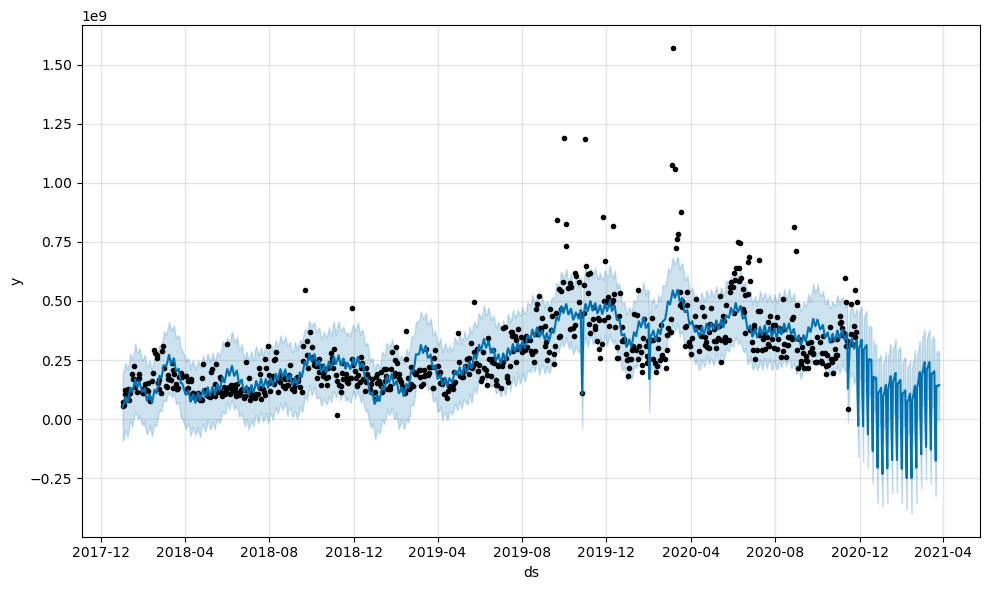

In [184]:
result = pd.concat([df_fb.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(forecast)

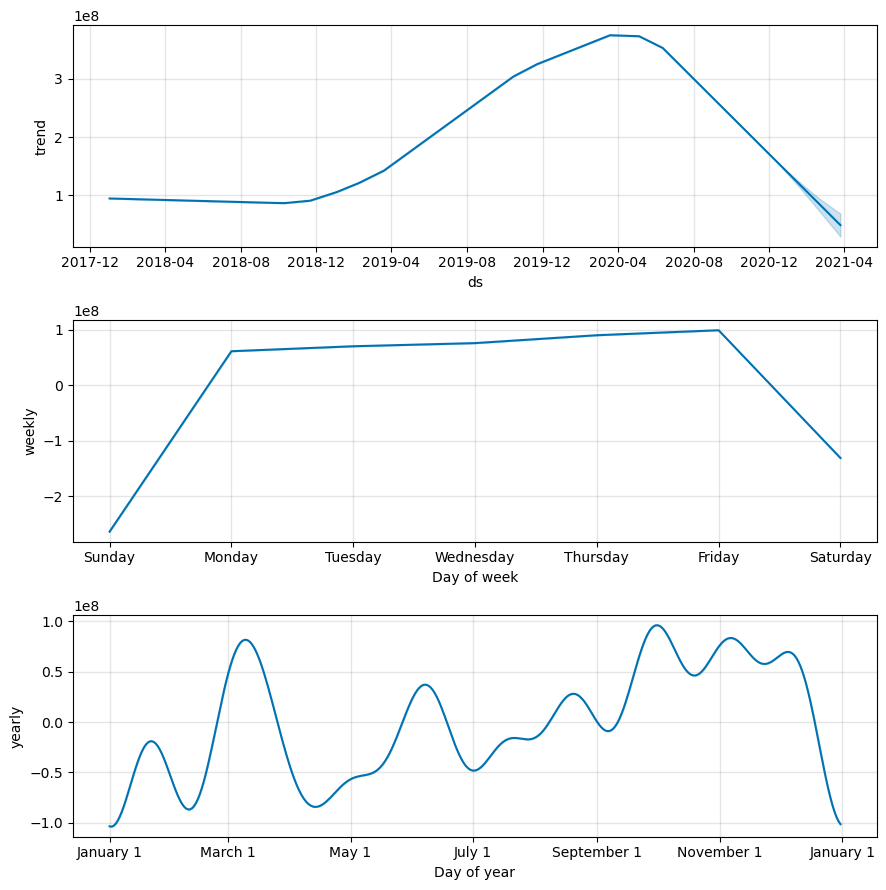

In [185]:
comp = m.plot_components(forecast)

In [186]:
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [188]:
result[result['error'].abs()>1.5*result['uncertainty']]

y          yhat    yhat_lower    yhat_upper  \
ds                                                                   
2019-10-01  1.187314e+09  4.593412e+08  3.192336e+08  5.993054e+08   
2019-10-31  1.186434e+09  4.749481e+08  3.405386e+08  6.220170e+08   
2020-03-05  1.075709e+09  5.313153e+08  3.920963e+08  6.708492e+08   
2020-03-06  1.568143e+09  5.443826e+08  4.103372e+08  6.828031e+08   
2020-03-09  1.058983e+09  5.131905e+08  3.730942e+08  6.551746e+08   
2021-01-06  5.461450e+08  1.141339e+08 -3.677581e+07  2.445203e+08   
2021-01-13  6.318063e+08  1.490694e+08  6.970860e+06  2.875733e+08   
2021-01-28  6.166022e+08  1.632691e+08  1.371420e+07  3.062542e+08   
2021-02-01  7.246031e+08  1.085257e+08 -4.401967e+07  2.419568e+08   
2021-02-02  6.722009e+08  1.109310e+08 -2.563689e+07  2.447269e+08   
2021-02-03  6.052042e+08  1.103556e+08 -2.595987e+07  2.551198e+08   
2021-02-04  8.296718e+08  1.186924e+08 -2.188383e+07  2.599721e+08   
2021-02-05  9.295842e+08  1.223720e+08 -2.590528e+07  2.624639e+08   
2021-02-09  6.924810e+08  7.987559e+07 -5.079746e+07  2.227473e+08   
2021-02-17  8.504874e+08  1.054203e+08 -4.216558e+07  2.361477e+08   
2021-02-18  8.603311e+08  1.261500e+08 -1.101956e+07  2.651272e+08   
2021-02-19  1.057099e+09  1.423115e+08  1.003796e+06  2.947080e+08   
2021-02-22  5.587360e+08  1.285739e+08 -1.087308e+07  2.730269e+08   

                   error   uncertainty  
ds                                      
2019-10-01  7.279728e+08  2.800719e+08  
2019-10-31  7.114859e+08  2.814784e+08  
2020-03-05  5.443940e+08  2.787529e+08  
2020-03-06  1.023760e+09  2.724659e+08  
2020-03-09  5.457924e+08  2.820804e+08  
2021-01-06  4.320111e+08  2.812961e+08  
2021-01-13  4.827370e+08  2.806024e+08  
2021-01-28  4.533331e+08  2.925400e+08  
2021-02-01  6.160774e+08  2.859765e+08  
2021-02-02  5.612699e+08  2.703638e+08  
2021-02-03  4.948485e+08  2.810796e+08  
2021-02-04  7.109794e+08  2.818560e+08  
2021-02-05  8.072122e+08  2.883692e+08  
2021-02-09  6.126054e+08  2.735447e+08  
2021-02-17  7.450671e+08  2.783133e+08  
2021-02-18  7.341811e+08  2.761468e+08  
2021-02-19  9.147880e+08  2.937042e+08  
2021-02-22  4.301621e+08  2.839000e+08

In [192]:
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)

In [190]:
#visualize the anomaly data
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='Anomaly Detection using fbprophet')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='3y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()

In [193]:
result['is_anomaly'] = result.apply(lambda x: 1 if(np.abs(x['error']) > 1.5*x['uncertainty']) else 0, axis = 1)

In [196]:
result['ds']=result.index
result.head()

y          yhat    yhat_lower    yhat_upper  \
ds                                                                  
2018-01-01   57576913.0  5.244598e+07 -9.174380e+07  1.897427e+08   
2018-01-02   72033811.0  6.072011e+07 -7.868023e+07  2.062054e+08   
2018-01-03   59730356.0  6.692337e+07 -8.385841e+07  2.054927e+08   
2018-01-04  105995860.0  8.275875e+07 -5.078985e+07  2.317505e+08   
2018-01-05  123622612.0  9.445237e+07 -4.633232e+07  2.377940e+08   

                   error   uncertainty anomaly  is_anomaly         ds  
ds                                                                     
2018-01-01  5.130929e+06  2.814865e+08      No           0 2018-01-01  
2018-01-02  1.131370e+07  2.848856e+08      No           0 2018-01-02  
2018-01-03 -7.193019e+06  2.893511e+08      No           0 2018-01-03  
2018-01-04  2.323711e+07  2.825404e+08      No           0 2018-01-04  
2018-01-05  2.917025e+07  2.841263e+08      No           0 2018-01-05

In [198]:
# Reset the index
result.reset_index(drop=True, inplace=True)
result.head()

y          yhat    yhat_lower    yhat_upper         error  \
0   57576913.0  5.244598e+07 -9.174380e+07  1.897427e+08  5.130929e+06   
1   72033811.0  6.072011e+07 -7.868023e+07  2.062054e+08  1.131370e+07   
2   59730356.0  6.692337e+07 -8.385841e+07  2.054927e+08 -7.193019e+06   
3  105995860.0  8.275875e+07 -5.078985e+07  2.317505e+08  2.323711e+07   
4  123622612.0  9.445237e+07 -4.633232e+07  2.377940e+08  2.917025e+07   

    uncertainty anomaly  is_anomaly         ds  
0  2.814865e+08      No           0 2018-01-01  
1  2.848856e+08      No           0 2018-01-02  
2  2.893511e+08      No           0 2018-01-03  
3  2.825404e+08      No           0 2018-01-04  
4  2.841263e+08      No           0 2018-01-05

In [199]:

feature_name = 'is_anomaly'
value = 1


outlier_index = result.index[result[feature_name] == value].tolist()

print("Indices:", len(outlier_index))

Indices: 18


In [202]:
# filter outlier values
result.set_index('ds',inplace=True)
outlier_values = result.iloc[outlier_index]
outlier_values

y          yhat    yhat_lower    yhat_upper  \
ds                                                                   
2019-10-01  1.187314e+09  4.593412e+08  3.192336e+08  5.993054e+08   
2019-10-31  1.186434e+09  4.749481e+08  3.405386e+08  6.220170e+08   
2020-03-05  1.075709e+09  5.313153e+08  3.920963e+08  6.708492e+08   
2020-03-06  1.568143e+09  5.443826e+08  4.103372e+08  6.828031e+08   
2020-03-09  1.058983e+09  5.131905e+08  3.730942e+08  6.551746e+08   
2021-01-06  5.461450e+08  1.141339e+08 -3.677581e+07  2.445203e+08   
2021-01-13  6.318063e+08  1.490694e+08  6.970860e+06  2.875733e+08   
2021-01-28  6.166022e+08  1.632691e+08  1.371420e+07  3.062542e+08   
2021-02-01  7.246031e+08  1.085257e+08 -4.401967e+07  2.419568e+08   
2021-02-02  6.722009e+08  1.109310e+08 -2.563689e+07  2.447269e+08   
2021-02-03  6.052042e+08  1.103556e+08 -2.595987e+07  2.551198e+08   
2021-02-04  8.296718e+08  1.186924e+08 -2.188383e+07  2.599721e+08   
2021-02-05  9.295842e+08  1.223720e+08 -2.590528e+07  2.624639e+08   
2021-02-09  6.924810e+08  7.987559e+07 -5.079746e+07  2.227473e+08   
2021-02-17  8.504874e+08  1.054203e+08 -4.216558e+07  2.361477e+08   
2021-02-18  8.603311e+08  1.261500e+08 -1.101956e+07  2.651272e+08   
2021-02-19  1.057099e+09  1.423115e+08  1.003796e+06  2.947080e+08   
2021-02-22  5.587360e+08  1.285739e+08 -1.087308e+07  2.730269e+08   

                   error   uncertainty anomaly  is_anomaly  
ds                                                          
2019-10-01  7.279728e+08  2.800719e+08     Yes           1  
2019-10-31  7.114859e+08  2.814784e+08     Yes           1  
2020-03-05  5.443940e+08  2.787529e+08     Yes           1  
2020-03-06  1.023760e+09  2.724659e+08     Yes           1  
2020-03-09  5.457924e+08  2.820804e+08     Yes           1  
2021-01-06  4.320111e+08  2.812961e+08     Yes           1  
2021-01-13  4.827370e+08  2.806024e+08     Yes           1  
2021-01-28  4.533331e+08  2.925400e+08     Yes           1  
2021-02-01  6.160774e+08  2.859765e+08     Yes           1  
2021-02-02  5.612699e+08  2.703638e+08     Yes           1  
2021-02-03  4.948485e+08  2.810796e+08     Yes           1  
2021-02-04  7.109794e+08  2.818560e+08     Yes           1  
2021-02-05  8.072122e+08  2.883692e+08     Yes           1  
2021-02-09  6.126054e+08  2.735447e+08     Yes           1  
2021-02-17  7.450671e+08  2.783133e+08     Yes           1  
2021-02-18  7.341811e+08  2.761468e+08     Yes           1  
2021-02-19  9.147880e+08  2.937042e+08     Yes           1  
2021-02-22  4.301621e+08  2.839000e+08     Yes           1

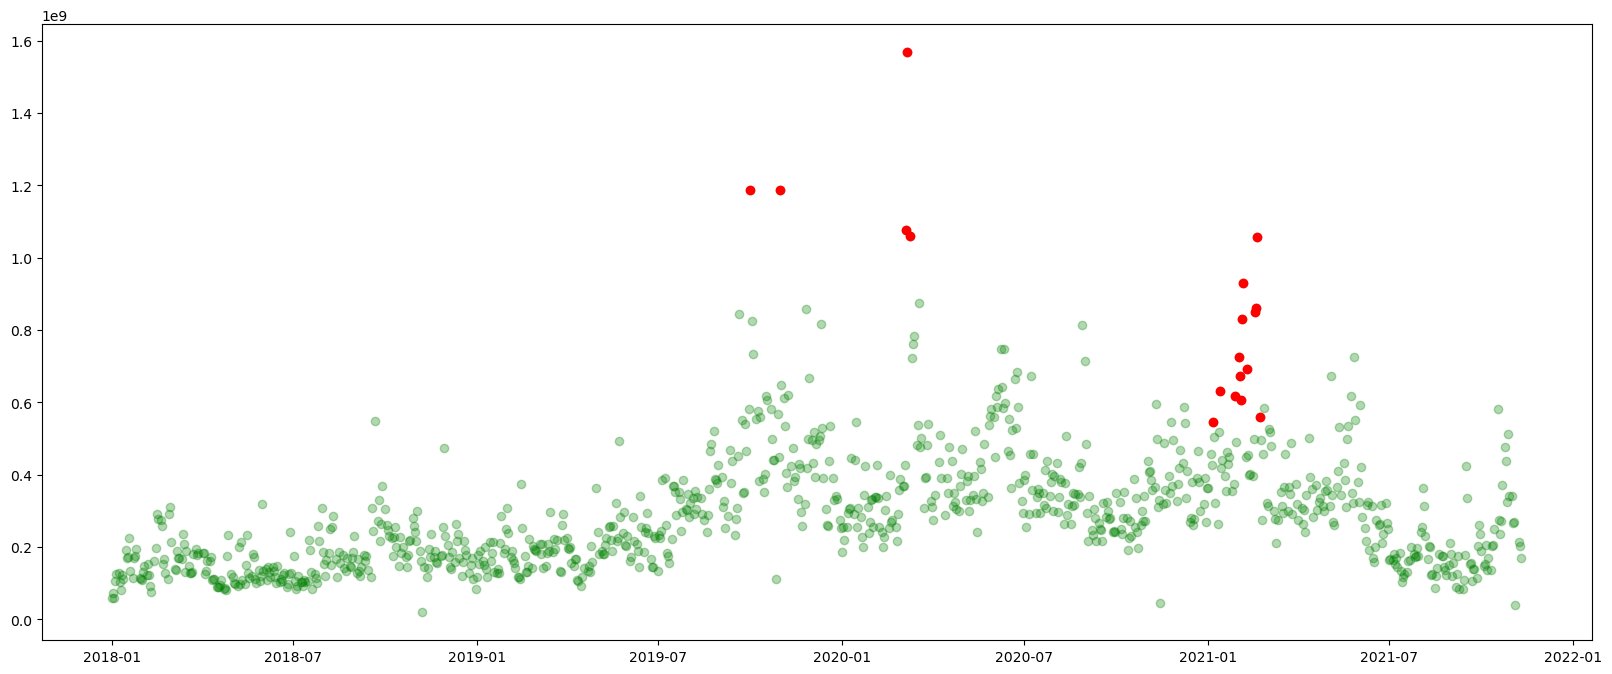

In [203]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(result.index,result['y'] ,color = "g",alpha=0.3)
otlr_val = result.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val['y'], color = "r")

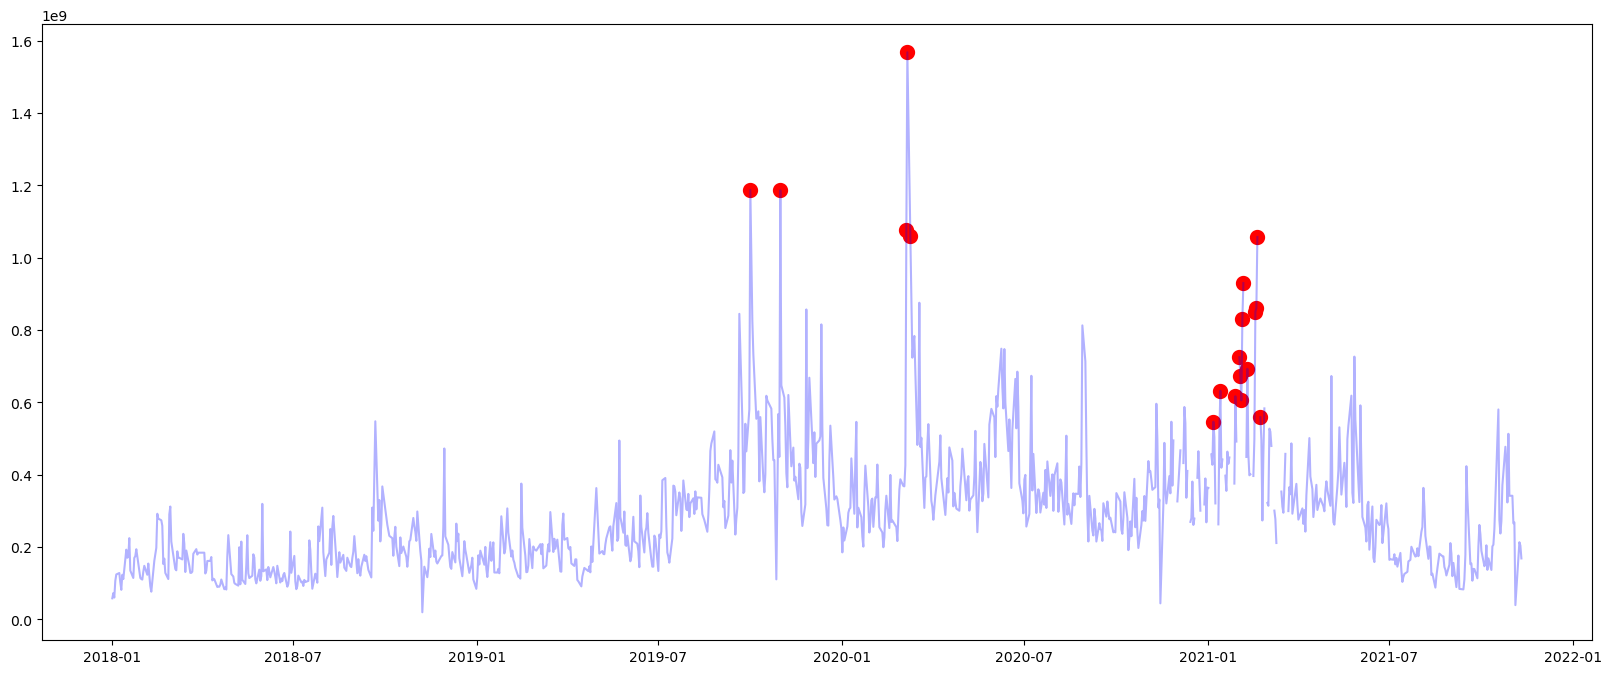

In [204]:
# plot data
plt.figure(figsize=(20,8))
plt.plot(result.index,result['y'] ,color = "b",alpha = 0.3)
# plot outlier values
plt.scatter(otlr_val.index,otlr_val['y'], color='r',linewidths=5)

In [229]:
prp_ano=np.array(result['is_anomaly'])
new_values = [0, 0]

prp_ano = np.append(prp_ano, new_values)
prp_ano=prp_ano[:-40]
print(len(prp_ano))

955


In [262]:
import numpy as np

stacked_results = np.vstack([iso_ano, kn_ano, db_ano, prp_ano])

final_anomalies = np.sum(stacked_results, axis=0) > 2

print("Final Anomalies (1 indicates anomaly, 0 indicates normal):", final_anomalies)


Final Anomalies (1 indicates anomaly, 0 indicates normal): [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False Fals

In [263]:
from collections import Counter
a = dict(Counter(final_anomalies))
print(a)

{False: 928, True: 27}


In [264]:
df5=df.copy()
df5['is_anomaly']=final_anomalies
df5['is_anomaly']=df5['is_anomaly'].astype(int)
df5['Date']=df5.index
# df5.set_index('Date',inplace=True)
df5.head()

Open      High       Low     Close       Volume  is_anomaly  \
Date                                                                          
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0           0   
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0           0   
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0           0   
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0           0   
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0           0   

                 Date  
Date                   
2018-01-01 2018-01-01  
2018-01-02 2018-01-02  
2018-01-03 2018-01-03  
2018-01-04 2018-01-04  
2018-01-05 2018-01-05

In [265]:
df5.reset_index(drop=True, inplace=True)
feature_name = 'is_anomaly'
value = 1

outlier_index = df5.index[df5[feature_name] == value].tolist()

print("Indices:", len(outlier_index))

Indices: 27


In [266]:
df5.set_index('Date',inplace=True)

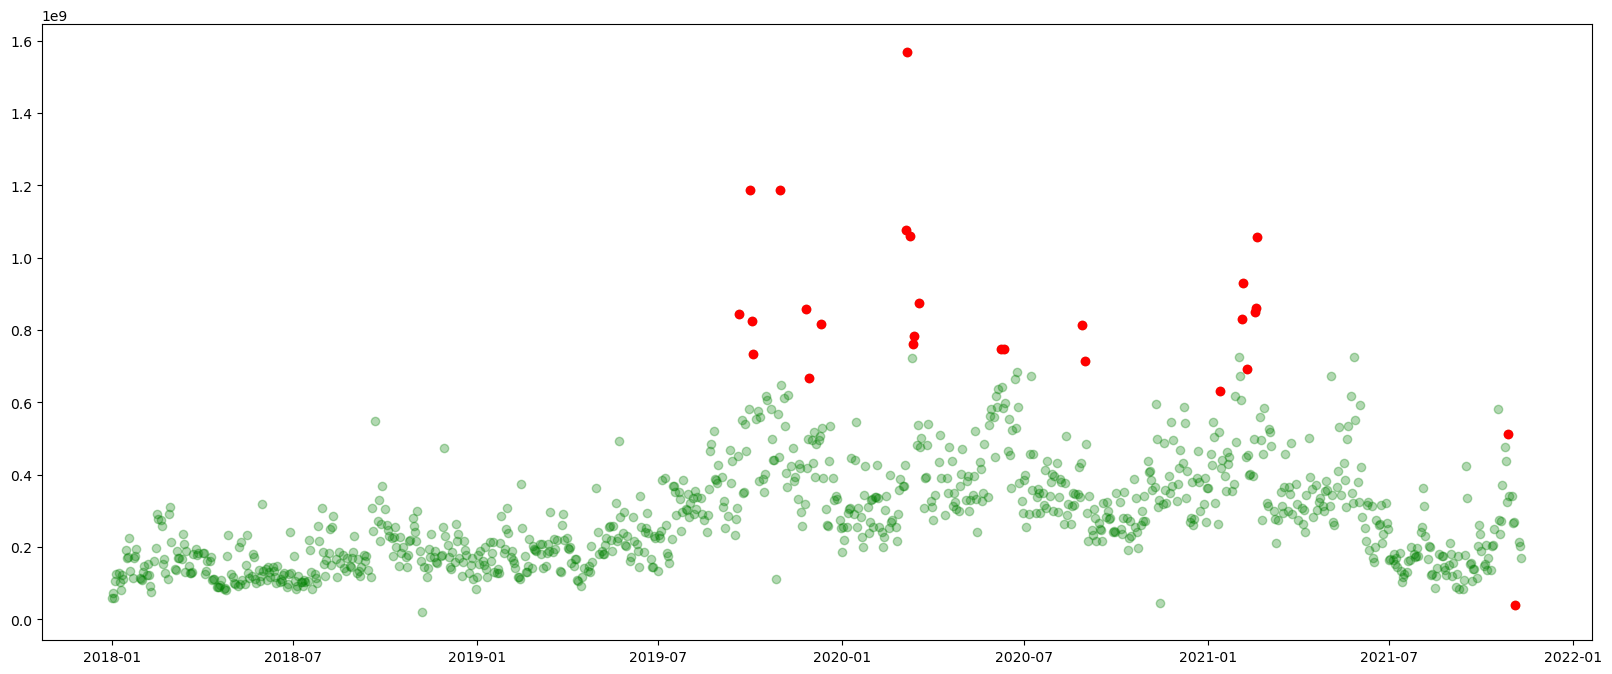

In [267]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(df5.index,df5['Volume'] ,color = "g",alpha=0.3)
otlr_val = df5.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val['Volume'], color = "r")

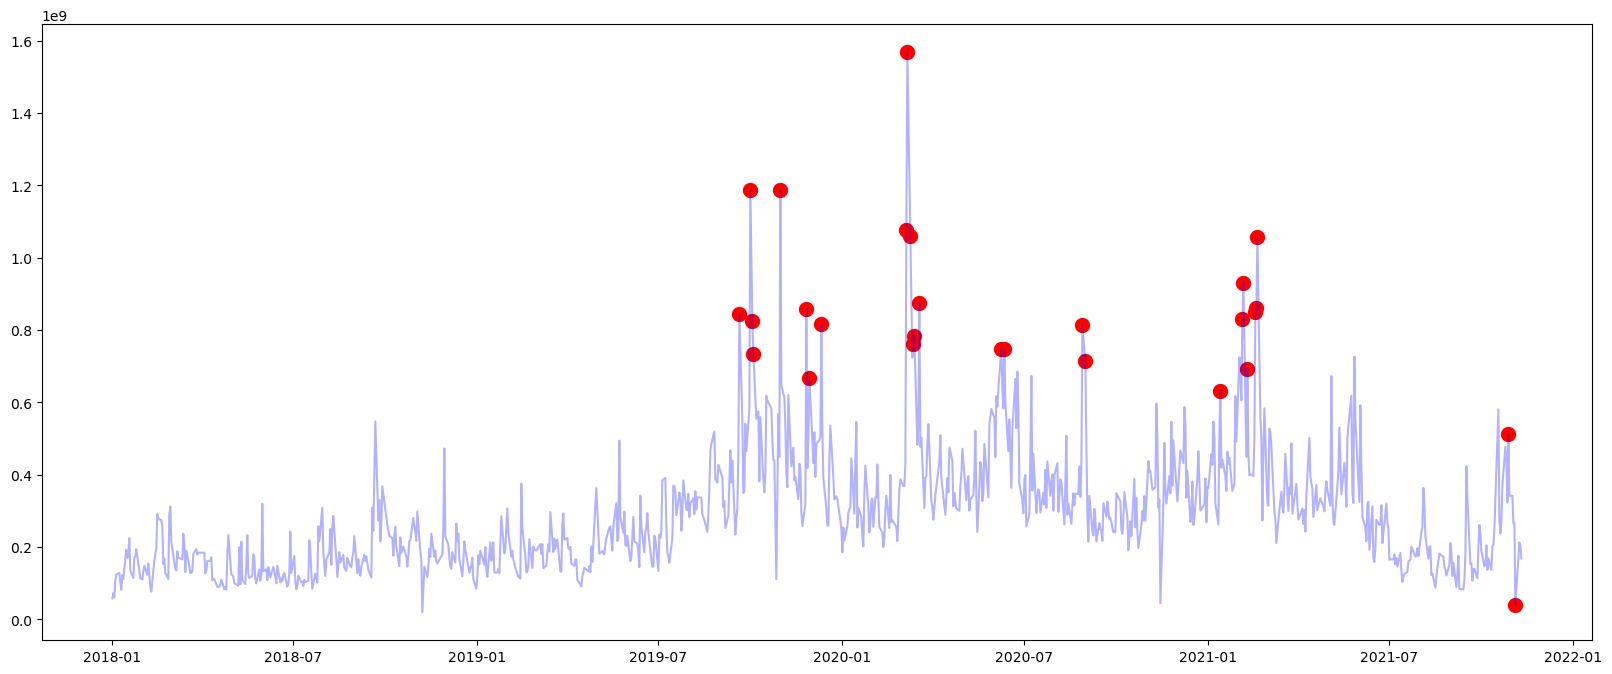

In [268]:
# plot data
plt.figure(figsize=(20,8))
plt.plot(df5.index,df5['Volume'] ,color = "b",alpha = 0.3)
# plot outlier values
plt.scatter(otlr_val.index,otlr_val['Volume'], color='r',linewidths=5)

In [272]:
df5['iso_anomaly']=iso_ano
df5['knn_anomaly']=kn_ano
df5['dbscan_anomaly']=db_ano
df5['prop_anomaly']=prp_ano
df5.head()

Open      High       Low     Close       Volume  is_anomaly  \
Date                                                                          
2018-01-01  25565.75  25588.00  25271.55  25318.10   57576913.0           0   
2018-01-02  25382.20  25425.50  25232.80  25338.25   72033811.0           0   
2018-01-03  25425.75  25454.90  25300.90  25318.60   59730356.0           0   
2018-01-04  25367.65  25490.35  25310.30  25462.60  105995860.0           0   
2018-01-05  25524.45  25643.35  25499.55  25601.85  123622612.0           0   

            iso_anomaly  knn_anomaly  dbscan_anomaly  prop_anomaly  
Date                                                                
2018-01-01            0            1               0             0  
2018-01-02            0            1               0             0  
2018-01-03            0            1               0             0  
2018-01-04            0            0               0             0  
2018-01-05            0            0               0             0